In [1]:
import pandas as pd
from pandas import to_datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('202003-citibike-tripdata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068457 entries, 0 to 1068456
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             1068457 non-null  int64  
 1   starttime                1068457 non-null  object 
 2   stoptime                 1068457 non-null  object 
 3   start station id         1068457 non-null  int64  
 4   start station name       1068457 non-null  object 
 5   start station latitude   1068457 non-null  float64
 6   start station longitude  1068457 non-null  float64
 7   end station id           1068457 non-null  int64  
 8   end station name         1068457 non-null  object 
 9   end station latitude     1068457 non-null  float64
 10  end station longitude    1068457 non-null  float64
 11  bikeid                   1068457 non-null  int64  
 12  usertype                 1068457 non-null  object 
 13  birth year               1068457 non-null 

In [4]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1589,2020-03-01 00:00:03.6400,2020-03-01 00:26:32.9860,224,Spruce St & Nassau St,40.711464,-74.005524,3574,Prospect Pl & Underhill Ave,40.676969,-73.965790,16214,Subscriber,1980,1
1,389,2020-03-01 00:00:16.7560,2020-03-01 00:06:46.0620,293,Lafayette St & E 8 St,40.730207,-73.991026,223,W 13 St & 7 Ave,40.737815,-73.999947,29994,Subscriber,1991,2
2,614,2020-03-01 00:00:20.0580,2020-03-01 00:10:34.2200,379,W 31 St & 7 Ave,40.749156,-73.991600,515,W 43 St & 10 Ave,40.760094,-73.994618,39853,Subscriber,1991,1
3,597,2020-03-01 00:00:24.3510,2020-03-01 00:10:22.3390,3739,Perry St & Greenwich Ave,40.735918,-74.000939,325,E 19 St & 3 Ave,40.736245,-73.984738,42608,Subscriber,1989,1
4,1920,2020-03-01 00:00:26.1120,2020-03-01 00:32:26.2680,236,St Marks Pl & 2 Ave,40.728419,-73.987140,3124,46 Ave & 5 St,40.747310,-73.954510,36288,Subscriber,1993,1


In [5]:
df.describe().round(2)

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1068457.00,1068457.00,1068457.00,1068457.00,1068457.00,1068457.00,1068457.00,1068457.00,1068457.00,1068457.00
mean,1160.83,1809.89,40.74,-73.98,1804.10,40.74,-73.98,33307.91,1979.90,1.17
std,13946.59,1511.14,0.03,0.02,1511.58,0.03,0.02,8231.19,12.53,0.54
min,61.00,72.00,40.66,-74.02,72.00,40.66,-74.07,14530.00,1885.00,0.00
25%,379.00,401.00,40.72,-73.99,398.00,40.72,-73.99,28841.00,1969.00,1.00
50%,680.00,530.00,40.74,-73.98,529.00,40.74,-73.98,35221.00,1982.00,1.00
75%,1246.00,3360.00,40.76,-73.97,3360.00,40.76,-73.97,40136.00,1990.00,1.00
max,3247190.00,3919.00,40.82,-73.90,3919.00,40.82,-73.90,43878.00,2004.00,2.00


### Data Types

In [6]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
    columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,tripduration,10252,int64,8547784
1,starttime,1068008,object,86545145
2,stoptime,1067964,object,86545145
3,start station id,889,int64,8547784
4,start station name,889,object,81856205
5,start station latitude,923,float64,8547784
6,start station longitude,912,float64,8547784
7,end station id,899,int64,8547784
8,end station name,899,object,81862917
9,end station latitude,932,float64,8547784


In [7]:
df['starttime'] = to_datetime(df['starttime'])
df['stoptime'] = to_datetime(df['stoptime'])

In [8]:
cols = ['start station name', 'end station name', 'usertype', 'gender']
for col in cols:
    df[col] = df[col].astype('category')

In [9]:
df['bikeid'] = df['bikeid'].astype('category')

In [10]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
    columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,tripduration,10252,int64,8547784
1,starttime,1068008,datetime64[ns],8547784
2,stoptime,1067964,datetime64[ns],8547784
3,start station id,889,int64,8547784
4,start station name,889,category,2239175
5,start station latitude,923,float64,8547784
6,start station longitude,912,float64,8547784
7,end station id,899,int64,8547784
8,end station name,899,category,2239883
9,end station latitude,932,float64,8547784


In [11]:
df['tripminutes'] = df['tripduration'] // 60 

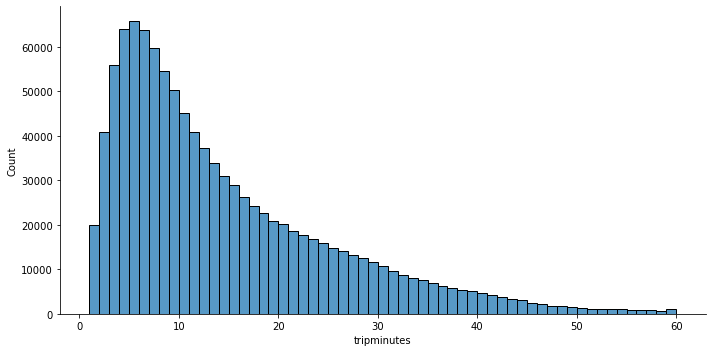

In [12]:
sns.displot(data=df,x="tripminutes" , bins=range(1,61) , aspect=10/5  ) ;

### Date components

In [13]:
df['start hour']=df['starttime'].dt.hour.astype('category')
df['start day']=df['starttime'].dt.day.astype('category')
df['weekday']=df['starttime'].dt.weekday.astype('category')

### Rides per Hour of the Day 

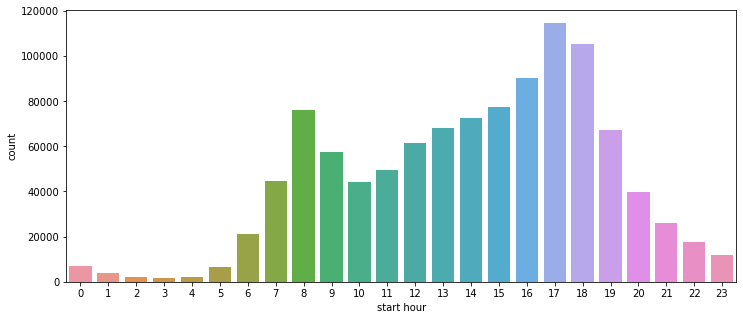

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="start hour" ) ;

### Rides per Day of Month

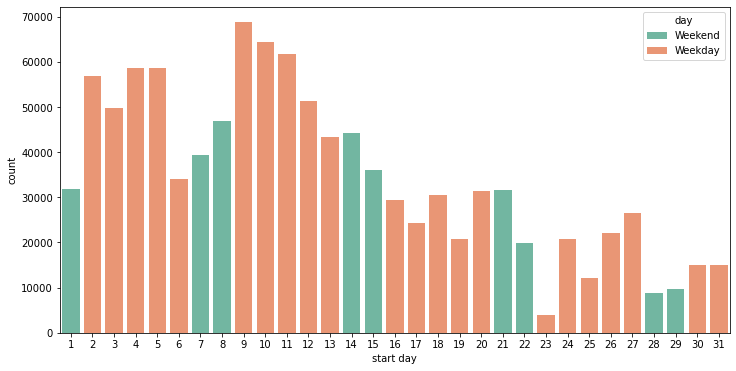

In [15]:
df['day'] = ["Weekday" if d <= 4  else "Weekend" for d in df['weekday']] # weekday values start with 0=Monday
plt.figure(figsize=(12,6))
sns.set_palette("Set2")
sns.countplot(data=df,x="start day" , hue='day' , dodge=False  ) ;

### Station Use


In [16]:
# startat = df.groupby("start station name")['start station name'].count().nlargest(20) 
startsstation = df['start station name'].value_counts()[:20]

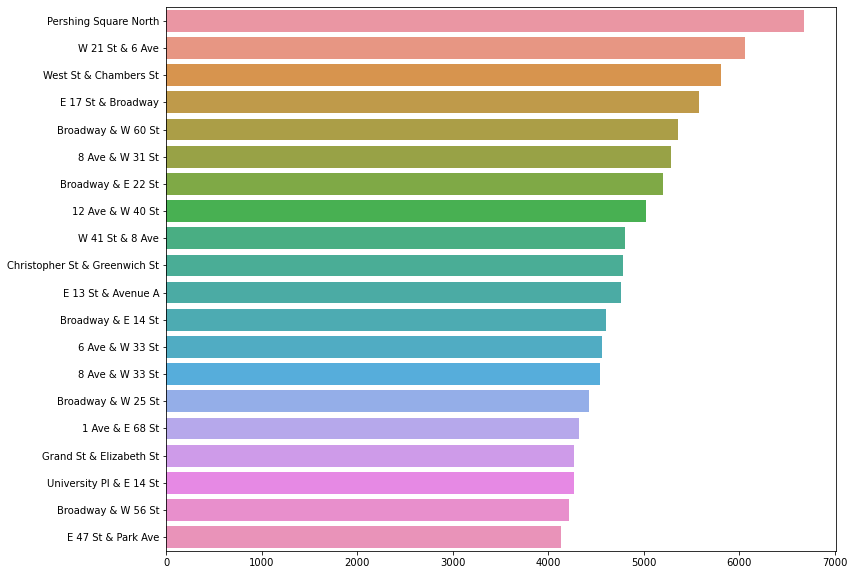

In [17]:
plt.figure(figsize=(12,10))
sns.barplot( x=startsstation.values , y=list(startsstation.index),  orient="h"  ) ;

### Rider's Ages 

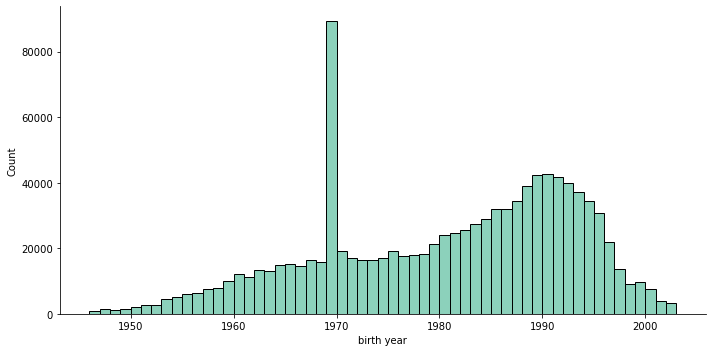

In [18]:
sns.displot(data=df,x="birth year" , bins=range(1946,2004),  aspect=10/5) ;

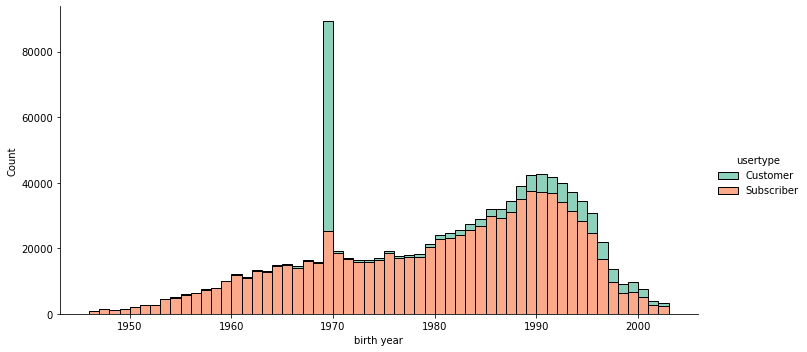

In [19]:
sns.displot(data=df,x="birth year", bins=range(1946,2004), hue='usertype', multiple='stack',  aspect=10/5) ;

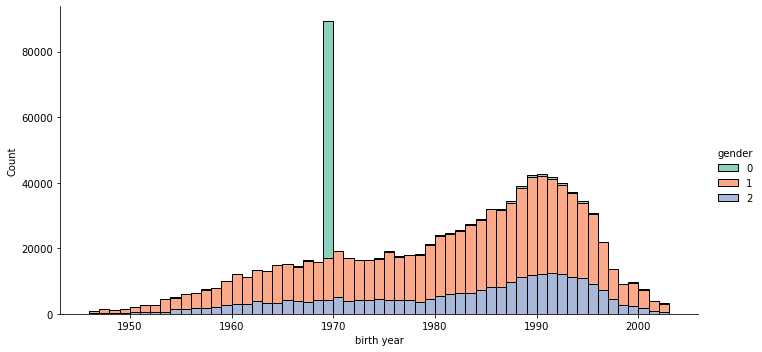

In [20]:
sns.displot(data=df,x="birth year" , bins=range(1946,2004), hue='gender',  multiple='stack', aspect=10/5) ;

In [21]:
skip = (df['gender'] == 0) | (df['birth year'] < 1946) 
df['age'] = (2020 - df['birth year']).mask(skip,None)
df['age'].describe()

count     981616
unique        59
top           30
freq       42167
Name: age, dtype: int64

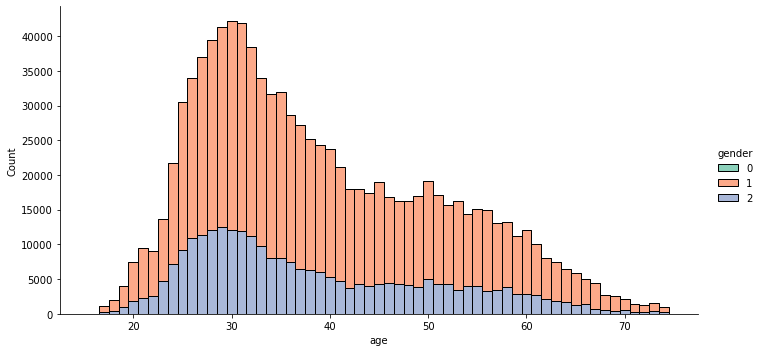

In [22]:
sns.displot(data=df, x='age', hue='gender', multiple='stack',  aspect=10/5) ;

### Write to Parquet 

In [23]:
df.to_parquet('202003-citibike-tripdata.parquet') 